# AI-Enabled FinTech B2B Invoice Management ML work

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading my dataset using pandas

In [3]:
df=pd.read_csv('H2HBABBA2115.csv')

In [4]:
df.shape

(50000, 19)

In [5]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,NaN,2020.0,1.930730e+09,2020-04-03,20200401,20200403,20200418.0,USD,RV,1.0,NaN,33548.18,20200403.0,NAH4,1.930730e+09,1
1,CA02,0140105847,GORDON F associates,2020-02-03 00:00:00,2020.0,2.960609e+09,2020-01-22,20200122,20200122,20200202.0,CAD,RV,1.0,NaN,11145.50,20200123.0,CA10,2.960609e+09,0
2,U001,0200466603,SMITH'S associates,2019-11-04 00:00:00,2019.0,1.930035e+09,2019-10-20,20191019,20191020,20191104.0,USD,RV,1.0,NaN,9420.29,20191020.0,NAA8,1.930035e+09,0
3,U001,0200230690,DECA us,2019-04-01 00:00:00,2019.0,1.928996e+09,2019-03-20,20190320,20190320,20190408.0,USD,RV,1.0,NaN,132.48,20190316.0,NAM4,1.928996e+09,0
4,U001,0200778355,US in,2019-02-08 00:00:00,2019.0,1.928653e+09,2019-01-22,20190120,20190122,20190206.0,USD,RV,1.0,NaN,52607.21,20190122.0,NAA8,1.928653e+09,0


# Preprocessing

In [6]:
#check null values of individual columns
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

In [7]:
#area_business column is completely NULL so dropping it using drop command
df.drop(columns='area_business',axis=1,inplace=True)
df.shape

(50000, 18)

In [8]:
#checking number of duplicated rows
df.duplicated().sum()

1147

In [9]:
#dropping duplicates rows 
df.drop_duplicates(keep='first',inplace=True)
df.shape

(48853, 18)

In [10]:
df[df['invoice_id'].isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
33933,CA02,0140104409,LOB co,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190314,20190324.0,CAD,X2,1.0,13595.04,20190314.0,CA10,NaN,0
41732,CA02,0140104429,COSTCO in,2019-05-14 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190311,20190321.0,CAD,X2,1.0,5353.20,20190311.0,CA10,NaN,0


In [11]:
#dropping 2 rows whose invoice_id is null 
df.dropna(subset=['invoice_id'],axis=0,inplace=True)
df.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9719
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
dtype: int64

In [12]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [13]:
#changing datatypes of date column using to_datetime
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [14]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [15]:
#checking columns having constant values
df['document type'].value_counts()

RV    48851
Name: document type, dtype: int64

In [16]:
df['posting_id'].value_counts()

1.0    48851
Name: posting_id, dtype: int64

In [17]:
#having same value throughout the column doesnot help in predicting delay_time so dropping using drop
df.drop(columns=['document type','posting_id'],axis=1,inplace=True)
df.shape

(48851, 16)

In [18]:
#storing all rows having clear_date as null in test dataframe
test=df[df['clear_date'].isnull()].copy()
test.shape
test1=test

In [19]:
#storing all rows having clear_date as not null in test dataframe
train_data=df.loc[df['clear_date'].notnull(), : ]
train_data.shape

(39132, 16)

In [20]:
#Sorting train_data with posting_date to arrange in such order that
#during x_val dataset have to predict future delays ,which he has not seen yet 
train_data=train_data.sort_values('posting_date')

In [21]:
train_data['delay_time']=(train_data['clear_date']-train_data['due_in_date']).dt.days

# Splitting

In [22]:
#separating delay time and dropping from train_data
y = train_data['delay_time']
x = train_data.drop('delay_time',axis=1)

In [23]:
#splitting of train_data into x_train , x_val and y into y_val , y_train
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=5 , shuffle = False)
x_train.shape,x_val.shape

((31305, 16), (7827, 16))

# Exploratory data analysis

<AxesSubplot:xlabel='delay_time', ylabel='Density'>

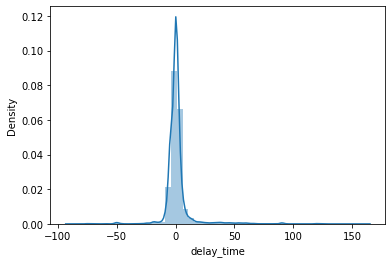

In [24]:
#symmetric distribution 
#outliers present but not significant
import seaborn as sns
sns.distplot(y_train)

<AxesSubplot:xlabel='total_open_amount', ylabel='delay_time'>

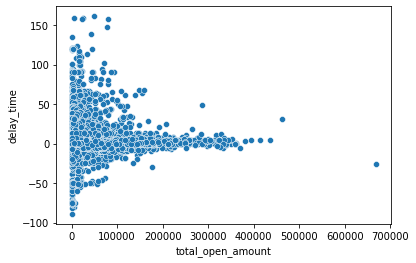

In [25]:
#delay_time is  more for total_open_amount less than 100000
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="total_open_amount", y="delay_time")

In [26]:
x_train['business_code'].value_counts()

U001    28229
CA02     2490
U013      464
U002      113
U005        8
U007        1
Name: business_code, dtype: int64

In [27]:
#as last two values very less so can grouped to another value.as they are less significant
x_train['business_code'] = np.where(x_train['business_code'].isin(["U007","U005","U002"]),"Other codes",x_train['business_code'])
x_val['business_code'] = np.where(x_val['business_code'].isin(["U007","U005","U002"]),"Other codes",x_val['business_code'])
test['business_code'] = np.where(test['business_code'].isin(["U007","U005","U002"]),"Other codes",test['business_code'])

In [28]:
x_train['business_code'].value_counts()

U001           28229
CA02            2490
U013             464
Other codes      122
Name: business_code, dtype: int64

In [29]:
x_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
15452,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,153.68,2018-12-30,NAA8,1.928538e+09,0
37880,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,7729.28,2018-12-30,NAH4,1.928539e+09,0
20137,U001,0200519201,KROGE foundation,2019-01-14,2019.0,1.928536e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,199715.15,2018-12-30,NAA8,1.928536e+09,0
19829,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1.928542e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,41564.45,2018-12-30,NAH4,1.928542e+09,0
13220,U001,0200769623,WAL-MAR in,2019-01-15,2019.0,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,6162.16,2018-12-30,NAH4,1.928539e+09,0


In [30]:
x_train['isOpen'].value_counts()

0    31305
Name: isOpen, dtype: int64

In [31]:
x_train['buisness_year'].value_counts()

2019.0    31305
Name: buisness_year, dtype: int64

In [32]:
#isOpen and buisness_year column is constant so drop
x_train.drop(columns=['isOpen','buisness_year'],axis=1,inplace=True)
x_val.drop(columns=['isOpen','buisness_year'],axis=1,inplace=True)
test.drop(columns=['isOpen','buisness_year'],axis=1,inplace=True)

In [33]:
x_train.shape,x_val.shape,test.shape

((31305, 14), (7827, 14), (9719, 14))

# Feature Engineering

In [34]:
x_train['business_code'].value_counts()

U001           28229
CA02            2490
U013             464
Other codes      122
Name: business_code, dtype: int64

In [35]:
#label encoding for business_code as it has less cardinality
from sklearn.preprocessing import LabelEncoder
buscode_encoder = LabelEncoder()
buscode_encoder.fit(x_train['business_code'])
x_train['business_code'] = buscode_encoder.transform(x_train['business_code'])
x_val['business_code'] = buscode_encoder.transform(x_val['business_code'])
test['business_code'] = buscode_encoder.transform(test['business_code'])

In [36]:
x_train[['business_code','business_code']]

,business_code,business_code
15452,2,2
37880,2,2
20137,2,2
19829,2,2
13220,2,2
...,...,...
45202,2,2
48530,2,2
32084,2,2
26014,2,2


In [37]:
#0 is mapped to 
x_train['business_code'].value_counts()

2    28229
0     2490
3      464
1      122
Name: business_code, dtype: int64

In [38]:
#as we can see positng_date and baseline_create_date are almost same ,so we can drop it.
(x_train['posting_date']==x_train['baseline_create_date']).sum()

27966

In [39]:
x_train.drop(columns=['baseline_create_date'],axis=1,inplace=True)
x_val.drop(columns=['baseline_create_date'],axis=1,inplace=True)
test.drop(columns=['baseline_create_date'],axis=1,inplace=True)

In [40]:
x_train.nunique()

business_code                 4
cust_number                1267
name_customer              3590
clear_date                  290
doc_id                    31305
posting_date                325
document_create_date        330
document_create_date.1      325
due_in_date                 366
invoice_currency              2
total_open_amount         28579
cust_payment_terms           65
invoice_id                31305
dtype: int64

In [41]:
#invoice_id and doc_id are unique columns and doesnot contribute in model building and is not a feature so we can drop it.
x_train.drop(columns=['invoice_id','doc_id'],axis=1,inplace=True)
x_val.drop(columns=['invoice_id','doc_id'],axis=1,inplace=True)
test.drop(columns=['invoice_id','doc_id'],axis=1,inplace=True)

In [42]:
x_train.shape

(31305, 11)

In [43]:
x_train


,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
15452,2,0200726979,BJ'S corporation,2019-01-15,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,153.68,NAA8
37880,2,0200769623,WAL-MAR corporation,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,7729.28,NAH4
20137,2,0200519201,KROGE foundation,2019-01-14,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,199715.15,NAA8
19829,2,0200769623,WAL-MAR foundation,2019-01-09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,41564.45,NAH4
13220,2,0200769623,WAL-MAR in,2019-01-15,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,6162.16,NAH4
...,...,...,...,...,...,...,...,...,...,...,...
45202,2,0200741174,M B us,2019-12-05,2019-11-19,2019-11-15,2019-11-19,2019-12-04,USD,5523.12,NAA8
48530,2,0200769623,WAL-MAR corp,2019-12-02,2019-11-19,2019-11-19,2019-11-19,2019-12-04,USD,44359.84,NAH4
32084,2,0200769623,WAL-MAR systems,2019-12-05,2019-11-19,2019-11-18,2019-11-19,2019-12-04,USD,64933.34,NAH4
26014,2,0200782669,SYGMA us,2019-12-24,2019-11-19,2019-11-19,2019-11-19,2019-12-21,USD,52314.02,NA32


In [44]:
x_train['name_customer'].value_counts()

WAL-MAR corp           698
WAL-MAR llc            697
WAL-MAR in             681
WAL-MAR systems        680
WAL-MAR corporation    673
                      ... 
B FERN us                1
KRIE llc                 1
LONG  co                 1
MICH corporation         1
PROFIC corporation       1
Name: name_customer, Length: 3590, dtype: int64

In [45]:
#mapping name_customer with frquency of values.
count_map = x_train['name_customer'].value_counts().to_dict()
x_train['name_customer'] = x_train['name_customer'].map(count_map)
count_map

{'WAL-MAR corp': 698,
 'WAL-MAR llc': 697,
 'WAL-MAR in': 681,
 'WAL-MAR systems': 680,
 'WAL-MAR corporation': 673,
 'WAL-MAR us': 664,
 'WAL-MAR associates': 653,
 'WAL-MAR trust': 651,
 'WAL-MAR foundation': 650,
 'WAL-MAR co': 649,
 'WAL-MAR ': 647,
 "BJ'S  corporation": 132,
 "BJ'S  associates": 128,
 "BJ'S  in": 126,
 "BJ'S  ": 124,
 "BJ'S  trust": 118,
 'C&S WH associates': 117,
 "BJ'S  co": 113,
 "BJ'S  systems": 112,
 "BJ'S  llc": 109,
 'SA foundation': 106,
 'C&S WH in': 102,
 'SA co': 101,
 'C&S WH corp': 100,
 'SA associates': 99,
 'SA corporation': 98,
 'SA corp': 98,
 'SA llc': 97,
 'SA trust': 96,
 "BJ'S  corp": 96,
 'C&S WH us': 96,
 'SA systems': 95,
 "BJ'S  us": 95,
 'C&S WH llc': 92,
 'C&S WH corporation': 91,
 'SA us': 91,
 'C&S WH co': 90,
 'SA in': 90,
 "BJ'S  foundation": 89,
 'C&S WH foundation': 88,
 'SA ': 83,
 'TARG associates': 80,
 'C&S WH trust': 79,
 'C&S WH ': 79,
 'COST co': 79,
 'C&S WH systems': 78,
 'DEC llc': 75,
 'ASSOCIAT trust': 73,
 'COST in': 7

In [46]:
x_train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
15452,2,0200726979,132,2019-01-15,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,153.68,NAA8
37880,2,0200769623,673,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,7729.28,NAH4
20137,2,0200519201,11,2019-01-14,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,199715.15,NAA8
19829,2,0200769623,650,2019-01-09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,41564.45,NAH4
13220,2,0200769623,681,2019-01-15,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,6162.16,NAH4
...,...,...,...,...,...,...,...,...,...,...,...
45202,2,0200741174,6,2019-12-05,2019-11-19,2019-11-15,2019-11-19,2019-12-04,USD,5523.12,NAA8
48530,2,0200769623,698,2019-12-02,2019-11-19,2019-11-19,2019-11-19,2019-12-04,USD,44359.84,NAH4
32084,2,0200769623,680,2019-12-05,2019-11-19,2019-11-18,2019-11-19,2019-12-04,USD,64933.34,NAH4
26014,2,0200782669,18,2019-12-24,2019-11-19,2019-11-19,2019-11-19,2019-12-21,USD,52314.02,NA32


In [47]:
#similarly mapping for x_val and test dataset
count_map = x_val['name_customer'].value_counts().to_dict()
x_val['name_customer'] = x_val['name_customer'].map(count_map)

In [48]:
count_map = test['name_customer'].value_counts().to_dict()
test['name_customer'] = test['name_customer'].map(count_map)

In [49]:
#using frequency encoding with cust_payment_terms .
count_map = x_train['cust_payment_terms'].value_counts().to_dict()
x_train['cust_payment_terms'] = x_train['cust_payment_terms'].map(count_map)

In [50]:
count_map = x_val['cust_payment_terms'].value_counts().to_dict()
x_val['cust_payment_terms'] = x_val['cust_payment_terms'].map(count_map)

In [51]:
count_map = test['cust_payment_terms'].value_counts().to_dict()
test['cust_payment_terms'] = test['cust_payment_terms'].map(count_map)

In [52]:
x_train.head()

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
15452,2,0200726979,132,2019-01-15,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,153.68,12597
37880,2,0200769623,673,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,7729.28,8146
20137,2,0200519201,11,2019-01-14,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,199715.15,12597
19829,2,0200769623,650,2019-01-09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,41564.45,8146
13220,2,0200769623,681,2019-01-15,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,6162.16,8146


In [53]:
#Label Encoding in column invoice_currency as cardinality is low
from sklearn.preprocessing import LabelEncoder
buscode_encoder = LabelEncoder()
buscode_encoder.fit(x_train['invoice_currency'])
x_train['invoice_currency'] = buscode_encoder.transform(x_train['invoice_currency'])
x_val['invoice_currency'] = buscode_encoder.transform(x_val['invoice_currency'])
test['invoice_currency'] = buscode_encoder.transform(test['invoice_currency'])

In [54]:
x_train.nunique()

business_code                 4
cust_number                1267
name_customer               111
clear_date                  290
posting_date                325
document_create_date        330
document_create_date.1      325
due_in_date                 366
invoice_currency              2
total_open_amount         28579
cust_payment_terms           41
dtype: int64

In [55]:
#Using frequency encoding to convert into numerical column
count_map = x_train['cust_number'].value_counts().to_dict()
x_train['cust_number'] = x_train['cust_number'].map(count_map)

In [56]:
count_map = x_val['cust_number'].value_counts().to_dict()
x_val['cust_number'] = x_val['cust_number'].map(count_map)

In [57]:
count_map = test['cust_number'].value_counts().to_dict()
test['cust_number'] = test['cust_number'].map(count_map)

In [58]:
#extracting dayofweek_name to use it it detecting whether it is weekend or not.
import datetime
x_train['dayofweek_name'] = x_train['due_in_date'].dt.day_name()
x_val['dayofweek_name'] = x_val['due_in_date'].dt.day_name()
test['dayofweek_name'] = test['due_in_date'].dt.day_name()

In [59]:
x_train['is_weekend'] = np.where(x_train['dayofweek_name'].isin(['Sunday','Saturday']),1,0)
x_val['is_weekend'] = np.where(x_val['dayofweek_name'].isin(['Sunday','Saturday']),1,0)
test['is_weekend'] = np.where(test['dayofweek_name'].isin(['Sunday','Saturday']),1,0)

In [60]:
#dropping all dates column as they don't contribute in delay .
x_train.drop(columns=['due_in_date','clear_date','dayofweek_name','document_create_date','document_create_date.1','posting_date'],axis=1,inplace=True)
x_val.drop(columns=['due_in_date','clear_date','dayofweek_name','document_create_date','document_create_date.1','posting_date'],axis=1,inplace=True)
test.drop(columns=['due_in_date','clear_date','dayofweek_name','document_create_date','document_create_date.1','posting_date'],axis=1,inplace=True)

In [61]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31305 entries, 15452 to 16467
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_code       31305 non-null  int32  
 1   cust_number         31305 non-null  int64  
 2   name_customer       31305 non-null  int64  
 3   invoice_currency    31305 non-null  int32  
 4   total_open_amount   31305 non-null  float64
 5   cust_payment_terms  31305 non-null  int64  
 6   is_weekend          31305 non-null  int32  
dtypes: float64(1), int32(3), int64(3)
memory usage: 1.6 MB


In [62]:
#converting total_open_amount into float type
x_train['total_open_amount'] = x_train['total_open_amount'].astype(int)

In [63]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31305 entries, 15452 to 16467
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   business_code       31305 non-null  int32
 1   cust_number         31305 non-null  int64
 2   name_customer       31305 non-null  int64
 3   invoice_currency    31305 non-null  int32
 4   total_open_amount   31305 non-null  int32
 5   cust_payment_terms  31305 non-null  int64
 6   is_weekend          31305 non-null  int32
dtypes: int32(4), int64(3)
memory usage: 1.4 MB


In [64]:
#converting total_open_amount into  int type in x_val and test 
x_val['total_open_amount'] = x_val['total_open_amount'].astype(int)
test['total_open_amount'] = test['total_open_amount'].astype(int)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

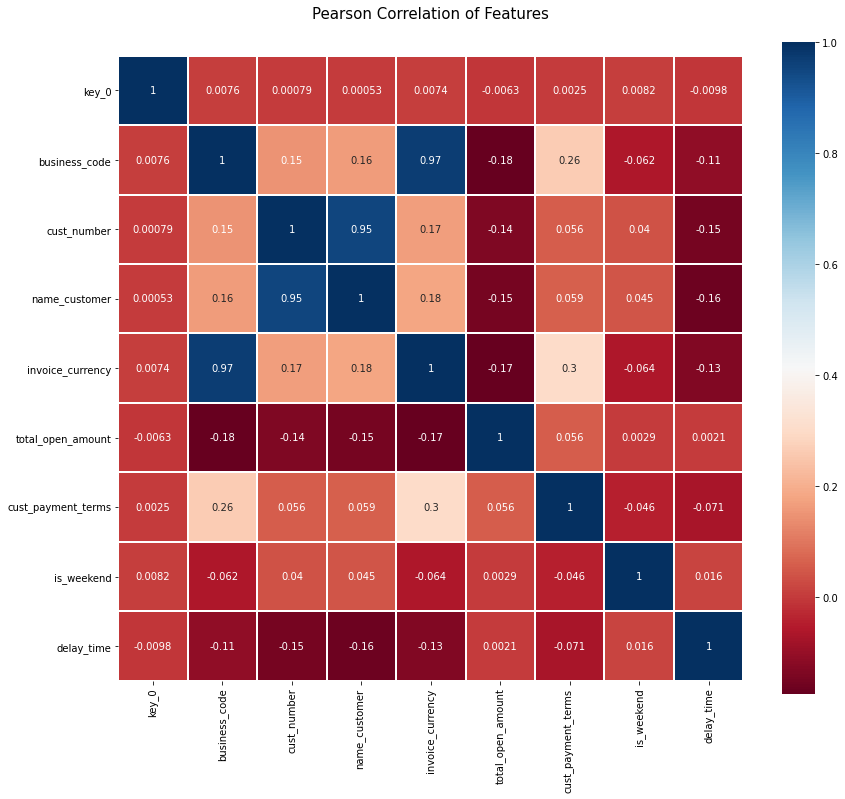

In [65]:
#Finding the correlation between the different columns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Modelling

In [66]:
#Building linear regression 
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(x_train, y_train)

LinearRegression()

In [67]:
y_predict = base_model.predict(x_val)
y_predict
#predicted delay_time

array([1.50922204, 1.40787008, 2.18568897, ..., 2.1475555 , 6.8737694 ,
       2.17680843])

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict, squared=False)

9.235179395340532

In [69]:
test

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,is_weekend
0,2,2515,252,1,33548,2945,1
5,2,305,40,1,38061,2945,0
6,2,2515,230,1,2173,2945,0
7,2,17,2,1,14216,4001,0
9,2,2515,248,1,6629,2945,0
...,...,...,...,...,...,...,...
49986,2,1,1,1,7558,73,1
49987,2,305,28,1,14142,2945,1
49992,2,17,2,1,698,4001,0
49997,2,2,1,1,2281,4001,0


<AxesSubplot:xlabel='delay_time', ylabel='Density'>

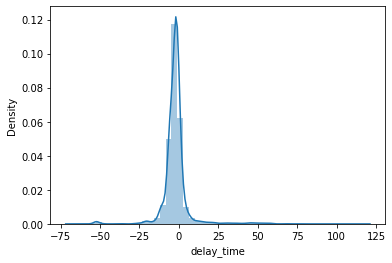

In [70]:
sns.distplot(y_val-y_predict)

In [71]:
#Root mean square of linear regression model
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict, squared=False)

9.235179395340532

# Decision TreeRegressor

In [72]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [73]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [74]:
y_predict2 = regressor.predict(x_val)

In [75]:
#similar to earlier linear regression model
mean_squared_error(y_val, y_predict2, squared=False)

9.610055396576987

In [76]:
#for test dataset
y_predict_tree = regressor.predict(test)

In [77]:
y_predict_tree

array([0.59168111, 1.46697707, 0.59168111, ..., 1.46697707, 1.46697707,
       1.46697707])

In [78]:
#Rnadom forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [80]:
y_pred = reg_rf.predict(x_val)

In [81]:
#higher than other two models
mean_squared_error(y_val, y_pred, squared=False)

15.349042761662337

In [82]:
reg_rf.score(x_train, y_train)

0.9087029799899885

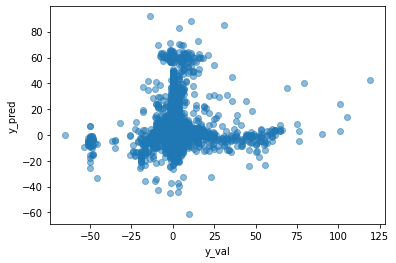

In [83]:
plt.scatter(y_val, y_pred, alpha = 0.5)
plt.xlabel("y_val")
plt.ylabel("y_pred")
plt.show()

In [84]:
#xgboost Model
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.1, learning_rate = 0.1,
                max_depth = 4, alpha = 5, n_estimators = 10)
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_val)

[20:37:39] WARNING: d:\build\xgboost\xgboost-1.4.2.git\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [85]:
mean_squared_error(y_val, preds, squared=False)

9.081483065776707

In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9719 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   business_code       9719 non-null   int32
 1   cust_number         9719 non-null   int64
 2   name_customer       9719 non-null   int64
 3   invoice_currency    9719 non-null   int32
 4   total_open_amount   9719 non-null   int32
 5   cust_payment_terms  9719 non-null   int64
 6   is_weekend          9719 non-null   int32
dtypes: int32(4), int64(3)
memory usage: 455.6 KB


In [87]:
#predicted delay for test dataset
predicted_delay=base_model.predict(test)
predicted_delay

array([0.92701722, 1.76325729, 1.05573736, ..., 2.35685231, 2.34520108,
       2.73938938])

In [88]:
#Creating predicted_delay column in test dataset and inserting values as predicted
test['predicted_delay']=predicted_delay
test['predicted_delay'].describe()

count    9719.000000
mean        2.057281
std         1.499983
min        -3.287770
25%         1.107612
50%         2.000547
75%         2.336785
max         7.863291
Name: predicted_delay, dtype: float64

In [89]:
#binning and bucketing the delay column
bins=[-15,0,15,30,45,60]
labels=['<0','0-15','16-30','30-45','45-60']
test['bucket']=pd.cut(test['predicted_delay'],bins,labels=labels)
test

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,is_weekend,predicted_delay,bucket
0,2,2515,252,1,33548,2945,1,0.927017,0-15
5,2,305,40,1,38061,2945,0,1.763257,0-15
6,2,2515,230,1,2173,2945,0,1.055737,0-15
7,2,17,2,1,14216,4001,0,2.215564,0-15
9,2,2515,248,1,6629,2945,0,0.856632,0-15
...,...,...,...,...,...,...,...,...,...
49986,2,1,1,1,7558,73,1,2.862154,0-15
49987,2,305,28,1,14142,2945,1,2.500579,0-15
49992,2,17,2,1,698,4001,0,2.356852,0-15
49997,2,2,1,1,2281,4001,0,2.345201,0-15


In [90]:
#adding column predicted delay_date
test1=df[df['clear_date'].isnull()].copy()
test1['due_in_date'] = pd.to_datetime(test1['due_in_date'], format='%Y%m%d')
test['predicted_delay'] = pd.to_timedelta(test['predicted_delay'],unit='D')
test['predicted_delay_date']=test1['due_in_date']+test['predicted_delay']

In [91]:
#final test dataset
test

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,is_weekend,predicted_delay,bucket,predicted_delay_date
0,2,2515,252,1,33548,2945,1,0 days 22:14:54.287635200,0-15,2020-04-18 22:14:54.287635200
5,2,305,40,1,38061,2945,0,1 days 18:19:05.430201600,0-15,2020-05-05 18:19:05.430201600
6,2,2515,230,1,2173,2945,0,1 days 01:20:15.707990400,0-15,2020-05-26 01:20:15.707990400
7,2,17,2,1,14216,4001,0,2 days 05:10:24.731760,0-15,2020-05-17 05:10:24.731760000
9,2,2515,248,1,6629,2945,0,0 days 20:33:32.986569600,0-15,2020-05-08 20:33:32.986569600
...,...,...,...,...,...,...,...,...,...,...
49986,2,1,1,1,7558,73,1,2 days 20:41:30.126422400,0-15,2020-04-07 20:41:30.126422400
49987,2,305,28,1,14142,2945,1,2 days 12:00:49.990867200,0-15,2020-05-11 12:00:49.990867200
49992,2,17,2,1,698,4001,0,2 days 08:33:52.039584,0-15,2020-04-26 08:33:52.039584000
49997,2,2,1,1,2281,4001,0,2 days 08:17:05.372880,0-15,2020-04-03 08:17:05.372880000


In [92]:
test1.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930730e+09,2020-04-03,2020-04-01,2020-04-03,2020-04-18,USD,33548.18,2020-04-03,NAH4,1.930730e+09,1
5,U001,0200759878,SA foundation,NaT,2020.0,1.930803e+09,2020-04-19,2020-04-20,2020-04-19,2020-05-04,USD,38061.93,2020-04-19,NAH4,1.930803e+09,1
6,U001,0200769623,WAL-MAR,NaT,2020.0,1.930884e+09,2020-05-10,2020-05-09,2020-05-10,2020-05-25,USD,2173.16,2020-05-10,NAH4,1.930884e+09,1
7,U001,0200782669,SYGMA corporation,NaT,2020.0,1.930844e+09,2020-04-30,2020-04-30,2020-04-30,2020-05-15,USD,14216.87,2020-04-30,NAA8,1.930844e+09,1
9,U001,0200769623,WAL-MAR trust,NaT,2020.0,1.930813e+09,2020-04-23,2020-04-22,2020-04-23,2020-05-08,USD,6629.30,2020-04-23,NAH4,1.930813e+09,1


In [93]:
test1.drop(columns=['clear_date','buisness_year','doc_id','invoice_currency','baseline_create_date','cust_payment_terms','isOpen','document_create_date','document_create_date.1','posting_date'],axis=1,inplace=True)

In [94]:
test1.head()

,business_code,cust_number,name_customer,due_in_date,total_open_amount,invoice_id
0,U001,0200769623,WAL-MAR systems,2020-04-18,33548.18,1.930730e+09
5,U001,0200759878,SA foundation,2020-05-04,38061.93,1.930803e+09
6,U001,0200769623,WAL-MAR,2020-05-25,2173.16,1.930884e+09
7,U001,0200782669,SYGMA corporation,2020-05-15,14216.87,1.930844e+09
9,U001,0200769623,WAL-MAR trust,2020-05-08,6629.30,1.930813e+09


In [95]:
test1.drop(columns=['business_code'],axis=1,inplace=True)

In [96]:
test1.head()

,cust_number,name_customer,due_in_date,total_open_amount,invoice_id
0,0200769623,WAL-MAR systems,2020-04-18,33548.18,1.930730e+09
5,0200759878,SA foundation,2020-05-04,38061.93,1.930803e+09
6,0200769623,WAL-MAR,2020-05-25,2173.16,1.930884e+09
7,0200782669,SYGMA corporation,2020-05-15,14216.87,1.930844e+09
9,0200769623,WAL-MAR trust,2020-05-08,6629.30,1.930813e+09


In [97]:
test1['Predicted payment date']=test['predicted_delay_date']

In [98]:
test1['Predicted Aging Bucket']=test['bucket']

In [99]:
test1.head()

,cust_number,name_customer,due_in_date,total_open_amount,invoice_id,Predicted payment date,Predicted Aging Bucket
0,0200769623,WAL-MAR systems,2020-04-18,33548.18,1.930730e+09,2020-04-18 22:14:54.287635200,0-15
5,0200759878,SA foundation,2020-05-04,38061.93,1.930803e+09,2020-05-05 18:19:05.430201600,0-15
6,0200769623,WAL-MAR,2020-05-25,2173.16,1.930884e+09,2020-05-26 01:20:15.707990400,0-15
7,0200782669,SYGMA corporation,2020-05-15,14216.87,1.930844e+09,2020-05-17 05:10:24.731760000,0-15
9,0200769623,WAL-MAR trust,2020-05-08,6629.30,1.930813e+09,2020-05-08 20:33:32.986569600,0-15


In [100]:
test1.rename(columns={'cust_number':'Customer Id','name_customer':'Customer Name','due_in_date':'due date','total_open_amount':'Invoice amount','invoice_id':'Invoice'},inplace=True)

In [101]:
test1.to_csv('data.csv', index=False)

In [102]:
test1.head()

,Customer Id,Customer Name,due date,Invoice amount,Invoice,Predicted payment date,Predicted Aging Bucket
0,0200769623,WAL-MAR systems,2020-04-18,33548.18,1.930730e+09,2020-04-18 22:14:54.287635200,0-15
5,0200759878,SA foundation,2020-05-04,38061.93,1.930803e+09,2020-05-05 18:19:05.430201600,0-15
6,0200769623,WAL-MAR,2020-05-25,2173.16,1.930884e+09,2020-05-26 01:20:15.707990400,0-15
7,0200782669,SYGMA corporation,2020-05-15,14216.87,1.930844e+09,2020-05-17 05:10:24.731760000,0-15
9,0200769623,WAL-MAR trust,2020-05-08,6629.30,1.930813e+09,2020-05-08 20:33:32.986569600,0-15


In [103]:
test1['Predicted payment date'] = pd.to_datetime(test1['Predicted payment date'],format='%Y%m%d').dt.date


In [104]:
test1.to_csv('table1.csv', index=False)